## Аналитика данных (временных рядов)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from tqdm import trange

In [6]:
# df = pd.read_csv('rates_frame_eurusd_H4.csv', index_col=0, delimiter='\t')      # ВЫвод из ФАЙЛА .CSV ; delimiter - это разделитель в файле csv с помошью знака запятой
df = pd.read_csv('rates_frame_eurusd_h4.csv', index_col=0, delimiter='\t')
df_new = df.drop(['tick_volume', 'spread', 'real_volume'], axis=1)     # удаляем 
#print(df)                                                    # index_col=0 - чтобы не отображать unnamed столбца с инднексом в csv файле
# df.tail()    # вывод нескольких строк для обзора содержимонго файла
df_new.head(3)

,time,open,high,low,close
0,2022-04-22 04:00:00,1.08368,1.08508,1.08303,1.08458
1,2022-04-22 08:00:00,1.08458,1.08519,1.07904,1.07978
2,2022-04-22 12:00:00,1.07978,1.08253,1.07920,1.08191


In [26]:
df_new['time'] = pd.to_datetime(df_new['time'])     # поле time строкового формата сделаем как дата !
df_new['sma_22'] = df_new.close.rolling(22).mean()       # создание нового поля содержащего SMA за n-баров
df_new["up"] = np.where(df_new.low > df_new["sma_22"]  , True, False)  # новое поле согласно условиям, если low ниже sma, то присвоим значение True
df_new["down"] = np.where(df_new.close < df_new["sma_22"]  , True, False)  # новое поле
df_new.round(5)   # Округление dataframe
# df_new.info()

,time,open,high,low,close,sma_22,up,down
0,2022-04-22 04:00:00,1.08368,1.08508,1.08303,1.08458,NaN,False,False
1,2022-04-22 08:00:00,1.08458,1.08519,1.07904,1.07978,NaN,False,False
2,2022-04-22 12:00:00,1.07978,1.08253,1.07920,1.08191,NaN,False,False
3,2022-04-22 16:00:00,1.08193,1.08450,1.07707,1.07789,NaN,False,False
4,2022-04-22 20:00:00,1.07789,1.08011,1.07780,1.08009,NaN,False,False
...,...,...,...,...,...,...,...,...
85,2022-05-12 08:00:00,1.05189,1.05210,1.04402,1.04407,1.05355,False,True
86,2022-05-12 12:00:00,1.04407,1.04465,1.03885,1.04168,1.05297,False,True
87,2022-05-12 16:00:00,1.04167,1.04262,1.03546,1.03594,1.05224,False,True
88,2022-05-12 20:00:00,1.03594,1.03822,1.03540,1.03779,1.05163,False,True


In [6]:
# df_temp = df_new.iloc[240:255]
df_temp = df_new.copy(deep=True)
# df_temp.loc['total'] = df_temp.sum(numeric_only=None, skipna = True)     # итоговая строка с подсуммированием по всем столбцу 
down = df_temp.down.sum()   # сумма итого datafarme по столбцу 'down'
up = df_temp.up.sum()
print(f"down count:{down}, up: {up}")

down count:57, up: 8


In [5]:
# df_temp.info()
df_temp.tail(5)

,time,open,high,low,close,sma_22,up,down
85,2022-05-02,1.05421,1.05681,1.04902,1.05072,1.078745,False,True
86,2022-05-03,1.05070,1.05775,1.04922,1.05202,1.076360,False,True
87,2022-05-04,1.05186,1.06306,1.05060,1.06219,1.074771,False,True
88,2022-05-05,1.06196,1.06419,1.04928,1.05410,1.073121,False,True
89,2022-05-06,1.05413,1.05987,1.04828,1.05439,1.071522,False,True


In [ ]:
# iterate for dataframe
deviation = 0.0005   # максимальное отклонение цены в пипсах
for i, row in df_temp.iterrows():
    temp_list = []
    # time.sleep()
    # print(i, row['time'].day, row['close'], row['low'])
    # print(f"{df_temp.time[i]}, next: {df_temp.time[i+1]}")   # вот так можно сравнивать строки !!!
    # print(f"{df_temp.loc[i]['low']}")    # или вот можно сравнить с предыдущей строкой
    temp_list = []
    temp_dict = {}
    if i > 0 and df_temp.close[i] <= df_temp.close[i-1]:
        temp_dict['begin_date'] = str(df_temp.time[i].day)
        temp_dict['close_price'] = df.close[i]
        print(f"day = {df_temp.time[i].day}, month: {df_temp.time[i].month}, {df.close[i]=} < {df.close[i-1]}")

        # if temp_dict['close_price'] <= df.close[i]:
            # print(f"mimimum closest prices: {temp_dict['close_price']}")


In [ ]:
# поиск максимально встречющегося элемента в списке counts_values - содержащем все значения которые были рядом
for i in range(20):     # проверка счетчика появлений значения до 10 - раз
    new_list = [e for e in set(counts_values) if counts_values.count(e) == i]
    if new_list:
        print(f"price : {new_list}, кол-во появлений: {i}") #[1, 3]

## Новая версия дополненная

In [56]:

def find_supports(delta: float):
    """
    поиск проторговок, delta - параметр отклноений(в пунктах) от цены возмжной проторговки/поддержки
    """
    dict_of_supports = {}
    a_massiv = np.array([])     # создаем пустой массив
    counts_values = []

    list_closes = df_temp.close.values.tolist()   # список значений из соответ-го столбца 'close'
    list_lowes = df_temp.low.values.tolist()      # список значений из соответ-го столбца 'low'
    full_list = list_lowes + list_closes          # все значения из 'close' and 'low'
    minimum_close = df_temp.close.min()           # минимальное значение из столбца 'close'
    id_close_price = df_temp.close.argmin()       # индекс строки где стоит минимальное значение по col 'close'
    begin_data = df_temp.time[id_close_price]     # начало даты проторговки
    print(f"{begin_data.day=}")


    distance_high = minimum_close + delta     # значение рядом (сверху) со минимльным значением
    distance_low = minimum_close - delta      # значение рядом (снизу) со минимльным значением 


    for i in trange (len(full_list)):       # цикл по столбцу "df_item" from df_list сверху/вниз
        value = full_list[i]            # get value from df
        #  print(i, value)
        # a_massiv = np.append(a_massiv, value)     # добавляем каждое новое value from df_column в массив array
        # minElement = np.amin(a_massiv)            # находим min- элемент массива [a_massiv] с добавленными элементами 
        minElement = minimum_close   # новая версия минимума
        time.sleep(0.01)

        if distance_low <= value <= distance_high:      # если значение value находится рядом с нашим minimum of a_massiv
            # print(f"номер строки i: {i}, from: {df_close.columns[0]}")  # df_item.columns[0] - str(имя колонки)
            counts_values.append(value)
    if counts_values and len(counts_values) > 3:
        dict_of_supports['support_'+ str(begin_data.day)+ '_'+ str(begin_data.month)] = {'begin_data': begin_data, 'price_close': minimum_close, 'counts_values': len(counts_values)}
        return counts_values, dict_of_supports
    
    
result, dict_of_supports = find_supports(delta = 0.00155)    
print(f"dict_of_supports: {dict_of_supports=}")
print(f"counts_values: {result}, len counts_values: {len(result)}")

begin_data.day=28


100%|██████████████████████████████████████████████| 180/180 [00:02<00:00, 60.11it/s]

dict_of_supports: dict_of_supports={'support_28_4': {'begin_data': Timestamp('2022-04-28 00:00:00'), 'price_close': 1.04983, 'counts_values': 8}}
counts_values: [1.04906, 1.04902, 1.04922, 1.0506, 1.04928, 1.04828, 1.04983, 1.05072], len counts_values: 8


In [ ]:
def find_resistance(delta: float, df: pd.DataFrame):
    """
    поиск сопротивлений, delta - параметр отклноений(в пунктах) от цены возмжной проторговки/сопротивления
    """
    counts_values = []
    list_closes = df.close.values.tolist()   # список значений из соответ-го столбца 'close'
    list_highs = df.high.values.tolist()      # список значений из соответ-го столбца 'low'
    full_list = list_highs + list_closes          # все значения из 'close' and 'low'
    maxmimum_high = df.high.max()           # минимальное значение из столбца 'close'
    id_high_price = df.high.argmax()       # индекс строки где стоит минимальное значение по col 'close'
    begin_data = df.time[id_high_price]     # начало даты проторговки
    
    distance_high = maxmimum_high + delta     # значение рядом (сверху) со минимльным значением
    distance_low = maxmimum_high - delta      # значение рядом (снизу) со минимльным значением 
    
    a_massiv = np.array([])     # создаем пустой массив
    # print(f"{maxmimum_high=}")
    
    for i, row in df.iterrows():
        if df.close[i] <= df.high[i]:
            # print(f"{df.time[i]=}, {df.close[i]=}, {df.high[i]}")+ delta
            # a_massiv = np.append(a_massiv, value)     # добавляем каждое новое value from df_column в массив array
            # minElement = np.amin(a_massiv)            # находим min- элемент массива [a_massiv] с добавленными элементами 
            
            if df.high[i] - delta <= df.high[i] <= df.high[i] + delta: 
                
    
find_resistance(delta=0.00015, df=df_temp )

# Визуализация данных из dataframe

## <font color='yellow'>1.1 Определение тренда по SMA </font> 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    90 non-null     datetime64[ns]
 1   open    90 non-null     float64       
 2   high    90 non-null     float64       
 3   low     90 non-null     float64       
 4   close   90 non-null     float64       
 5   sma_22  69 non-null     float64       
 6   up      90 non-null     bool          
 7   down    90 non-null     bool          
dtypes: bool(2), datetime64[ns](1), float64(5)
memory usage: 5.1 KB


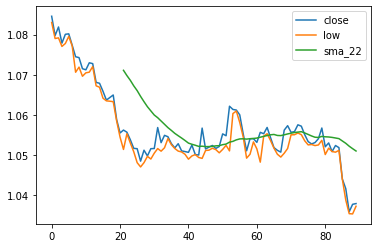

In [29]:
df_new[['close', 'low', 'sma_22']].plot()
df_new[['high', 'low']]
df_new.info()

time               2022-05-13 00:00:00
distance_to_sma               0.016305
dtype: object

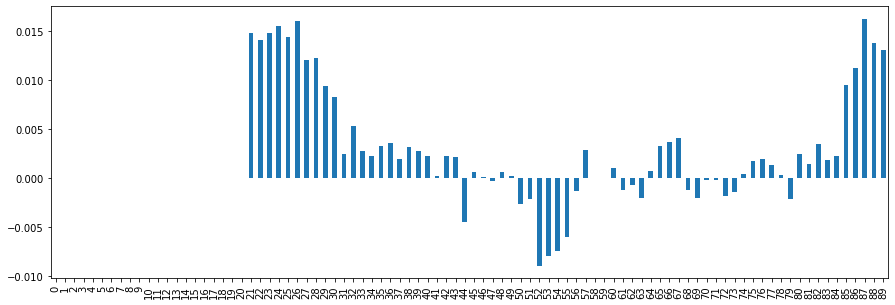

In [58]:
df_new['distance_to_sma'].dropna()
df_new["distance_to_sma"] =  df_new['sma_22'] - df_new['close']
df_new['distance_to_sma'].plot( kind='bar', figsize=(15,5))
df_new[['time', 'distance_to_sma']].max()
# df_new[df_new]